In [1]:
import json
from utils.plotting_tools import plot_cs_vqe_convergence

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


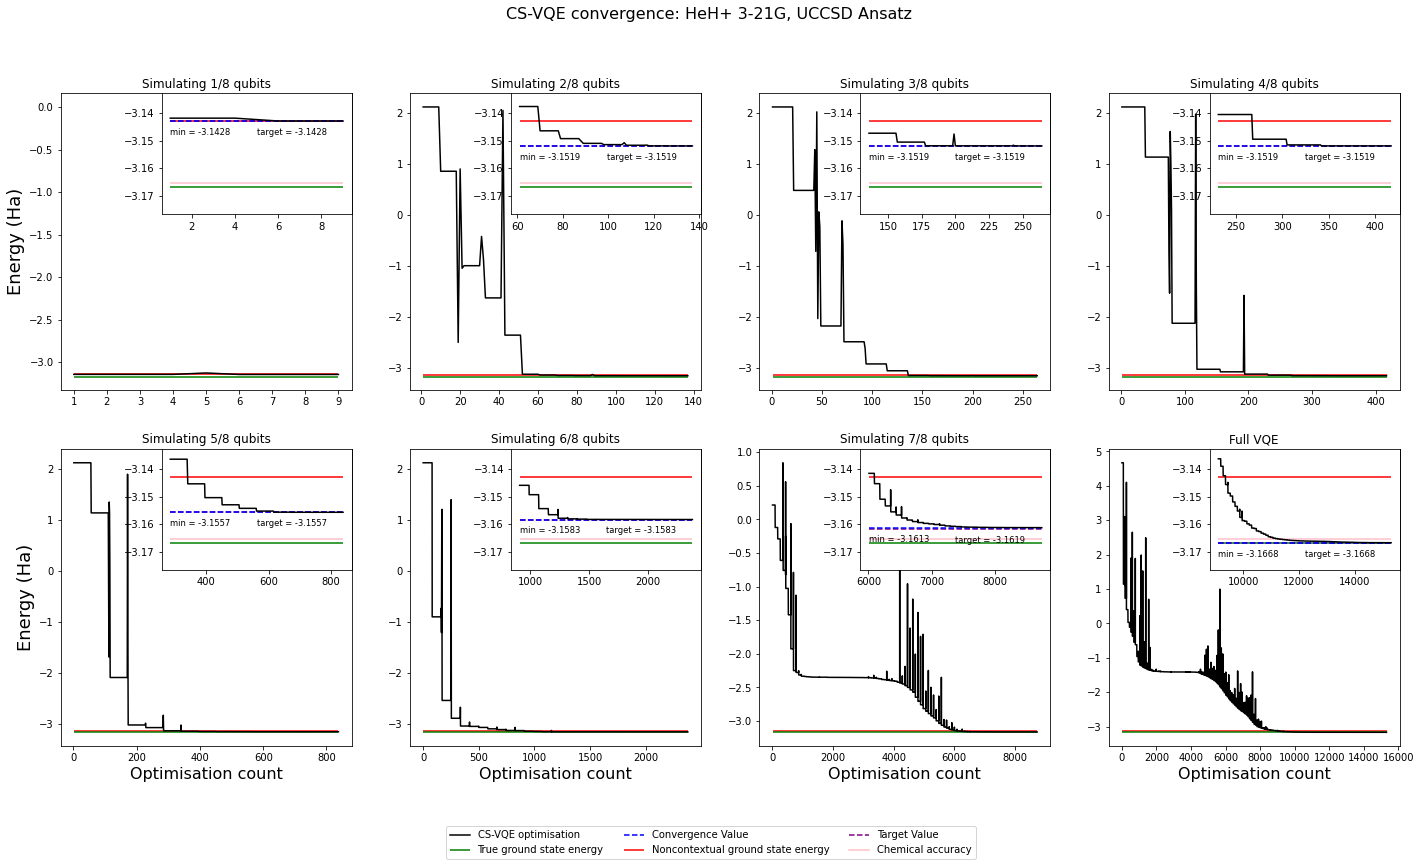

In [2]:
file = 'HeH+_3-21G_UCCSD_CS_VQE_results'
with open('data/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence(cs_vqe_data, 'CS-VQE convergence: HeH+ 3-21G, UCCSD Ansatz')
fig.savefig('plots/'+file+'.png', dpi=300)

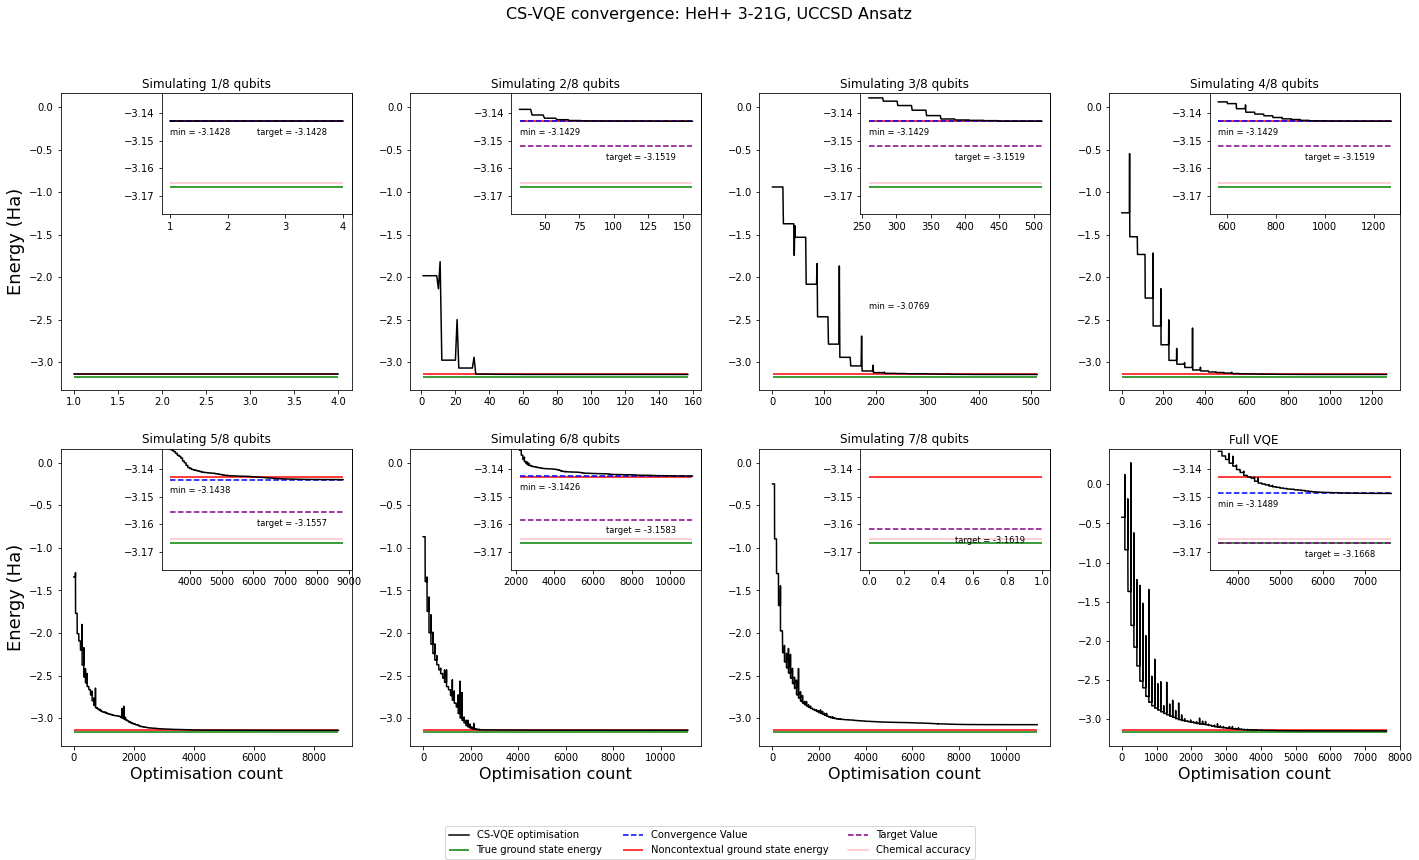

In [4]:
file='HeH+_3-21G_full_UCCSD_CS_VQE_results_rot_A_in_circuit_entgl_swap_with_ancilla'
with open('data/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence(cs_vqe_data, 'CS-VQE convergence: HeH+ 3-21G, UCCSD Ansatz')
fig.savefig('plots/'+file+'.png', dpi=300)